In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
X_train = pd.read_csv('train_X.csv')
X_test = pd.read_csv('test_X.csv')
y_train = pd.read_csv('train_y.csv')
y_test = pd.read_csv('test_y.csv')

In [3]:
X_train.head

<bound method NDFrame.head of       Id  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0      0       3    0  22.0      1      0   7.2500         1
1      1       1    1  38.0      1      0  71.2833         0
2      2       3    1  26.0      0      0   7.9250         1
3      3       1    1  35.0      1      0  53.1000         1
4      4       3    0  35.0      0      0   8.0500         1
..   ...     ...  ...   ...    ...    ...      ...       ...
886  886       2    0  27.0      0      0  13.0000         1
887  887       1    1  19.0      0      0  30.0000         1
888  888       3    1  20.0      1      2  23.4500         1
889  889       1    0  26.0      0      0  30.0000         0
890  890       3    0  32.0      0      0   7.7500         2

[891 rows x 8 columns]>

In [4]:
X_train = X_train.drop('Id',axis = 1)
X_test = X_test.drop('Id',axis = 1)
y_train = y_train.drop('Id',axis = 1)
y_test = y_test.drop('Id',axis = 1)

In [5]:
X_train.head

<bound method NDFrame.head of      Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         1
1         1    1  38.0      1      0  71.2833         0
2         3    1  26.0      0      0   7.9250         1
3         1    1  35.0      1      0  53.1000         1
4         3    0  35.0      0      0   8.0500         1
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         1
887       1    1  19.0      0      0  30.0000         1
888       3    1  20.0      1      2  23.4500         1
889       1    0  26.0      0      0  30.0000         0
890       3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]>

In [6]:
#converting into numpy array
X_train = X_train.values

In [7]:
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [8]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

In [10]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)


In [11]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [49]:
from sklearn.metrics import log_loss

def model(X,y, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))
    B = 0

    cost_list=[]
    

    for i in range(iterations):
        A = sigmoid(np.dot(W.T,X) + B)
        #cost function 
        cost = (-1/m)* np.sum(y*np.log(A) + (1-y)*np.log(1-A))
        
        # Calculate log loss (which is equivalent to binary cross-entropy loss)
        loss = log_loss(A, y)
        print(loss)
        # Gradient Descent
        dW = (1/m)*np.dot(A-y, X.T)
        dB = (1/m)*np.sum(A - y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [50]:
iterations = 100
learning_rate = 0.0015
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

ValueError: Multioutput target data is not supported with label binarization

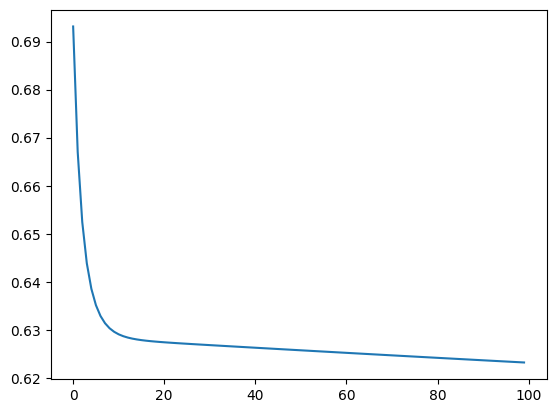

In [18]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [39]:

def accuracy(X, y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    print(A)
    A = A > 0.5

    print(A)

    A = np.array(A, dtype = 'int64')

    print(A)
    acc = (1 - np.sum(np.absolute(A - y))/y.shape[1])*100    ##np.sum(np.absolute(A - y) -> 1 for incorrect
    ## accuracy = correct // total
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [40]:
accuracy(X_test, y_test, W, B)

[0.28905661 0.22422169 0.16859322 0.33638717 0.38000743 0.42083321
 0.31740774 0.4136768  0.39273119 0.42178626        nan 0.28935134
 0.63283852 0.1990645  0.39858145 0.42784062 0.30447413 0.36994253
 0.33483577 0.23743109 0.33992282 0.43201105        nan 0.57329301
 0.92283775 0.2263665  0.57255434 0.36052889 0.33228327        nan
 0.2611051  0.43335537 0.33876374        nan 0.49729575 0.38586536
        nan 0.3771488  0.35134316        nan 0.28258698        nan
 0.25536179 0.34061818 0.3816977  0.34615179 0.30738817        nan
 0.37123899 0.3086863  0.54459365 0.36360448 0.43298256 0.95280879
        nan 0.50603397 0.28758781 0.34524906        nan 0.94392482
 0.39655116 0.32678333 0.38958837 0.36638547 0.967825          nan
 0.39240019 0.33456725 0.38930374 0.89646663 0.35399297 0.37095106
 0.32542818 0.40265478 0.89207299 0.89700909        nan 0.23969001
 0.33718038 0.35399297 0.49415361 0.79619101 0.27294168        nan
        nan        nan 0.33606708 0.39428279        nan 0.5532